In [1]:
import pandas as pd
import os
import numpy as np
import plotly.express as px
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PowerTransformer,MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV,LassoCV,LinearRegression,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
import warnings 

In [2]:
df=pd.read_csv('car_price.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(1202)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(6926, 13)

In [7]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [8]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [9]:
df.shape

(6926, 13)

In [10]:
df['max_power'] = df['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)

In [11]:
def number_extracter(df):
    cols=['mileage','engine']
    for iter in cols :
        df[iter]=df[iter].str.split(expand=True)[0].astype(float)
    return df
df=number_extracter(df)

In [12]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0


In [13]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

In [14]:
df['name'].nunique()

2058

In [15]:
df['torque'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7
0,190Nm@,2000rpm,None,None,None,None,None,None
1,250Nm@,1500-2500rpm,None,None,None,None,None,None
2,12.7@,"2,700(kgm@",rpm),None,None,None,None,None
3,22.4,kgm,at,1750-2750rpm,None,None,None,None
4,11.5@,"4,500(kgm@",rpm),None,None,None,None,None
...,...,...,...,...,...,...,...,...
8121,90Nm@,3500rpm,None,None,None,None,None,None
8122,219.7Nm@,1500-2750rpm,None,None,None,None,None,None
8123,113.7Nm@,4000rpm,None,None,None,None,None,None
8124,24@,"1,900-2,750(kgm@",rpm),None,None,None,None,None


In [16]:
df['torque'] = df['torque'].str.split(' ',expand=True)[0].str.extract(r'(\d+\.?\d*)').astype(float)
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0


In [17]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0


In [18]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
dtype: object

In [19]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        206
torque           209
seats            208
dtype: int64

In [20]:
imputer=KNNImputer()
cols=df[['mileage','engine','max_power','torque','seats']]
imputed =imputer.fit_transform(cols)
imputed[0:,0]

array([23.4 , 21.14, 17.7 , ..., 18.5 , 16.8 , 19.3 ])

In [21]:
imputed.shape

(6926, 5)

In [22]:
def imputations(imputed,df):
    cols=['mileage','engine','max_power','torque','seats']
    n=len(cols)
    for iter in range(n):
        df[cols[iter]]=imputed[0:,iter]
    return df
df=imputations(imputed,df)
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0


In [23]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [24]:
df['age']=2025-df['year']
df=df.drop(columns={'year'})
df.head()
df=df[['name','age','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque','seats','selling_price']]
df.head(2)

,name,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti Swift Dzire VDI,11,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,11,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,370000


In [25]:
df.corr(numeric_only=True)

,age,km_driven,mileage,engine,max_power,torque,seats,selling_price
age,1.000000,0.377003,-0.345307,0.017948,-0.151077,-0.248044,-0.022250,-0.433076
km_driven,0.377003,1.000000,-0.194545,0.250916,0.041269,0.048384,0.205956,-0.165620
mileage,-0.345307,-0.194545,1.000000,-0.577359,-0.375573,-0.131473,-0.459834,-0.107261
engine,0.017948,0.250916,-0.577359,1.000000,0.683769,0.611973,0.657020,0.439347
max_power,-0.151077,0.041269,-0.375573,0.683769,1.000000,0.743405,0.256758,0.686076
torque,-0.248044,0.048384,-0.131473,0.611973,0.743405,1.000000,0.320938,0.612036
seats,-0.022250,0.205956,-0.459834,0.657020,0.256758,0.320938,1.000000,0.156714
selling_price,-0.433076,-0.165620,-0.107261,0.439347,0.686076,0.612036,0.156714,1.000000


In [26]:
df.head(2)

,name,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti Swift Dzire VDI,11,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,11,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,370000


In [27]:
X=df.drop(columns={'selling_price'})

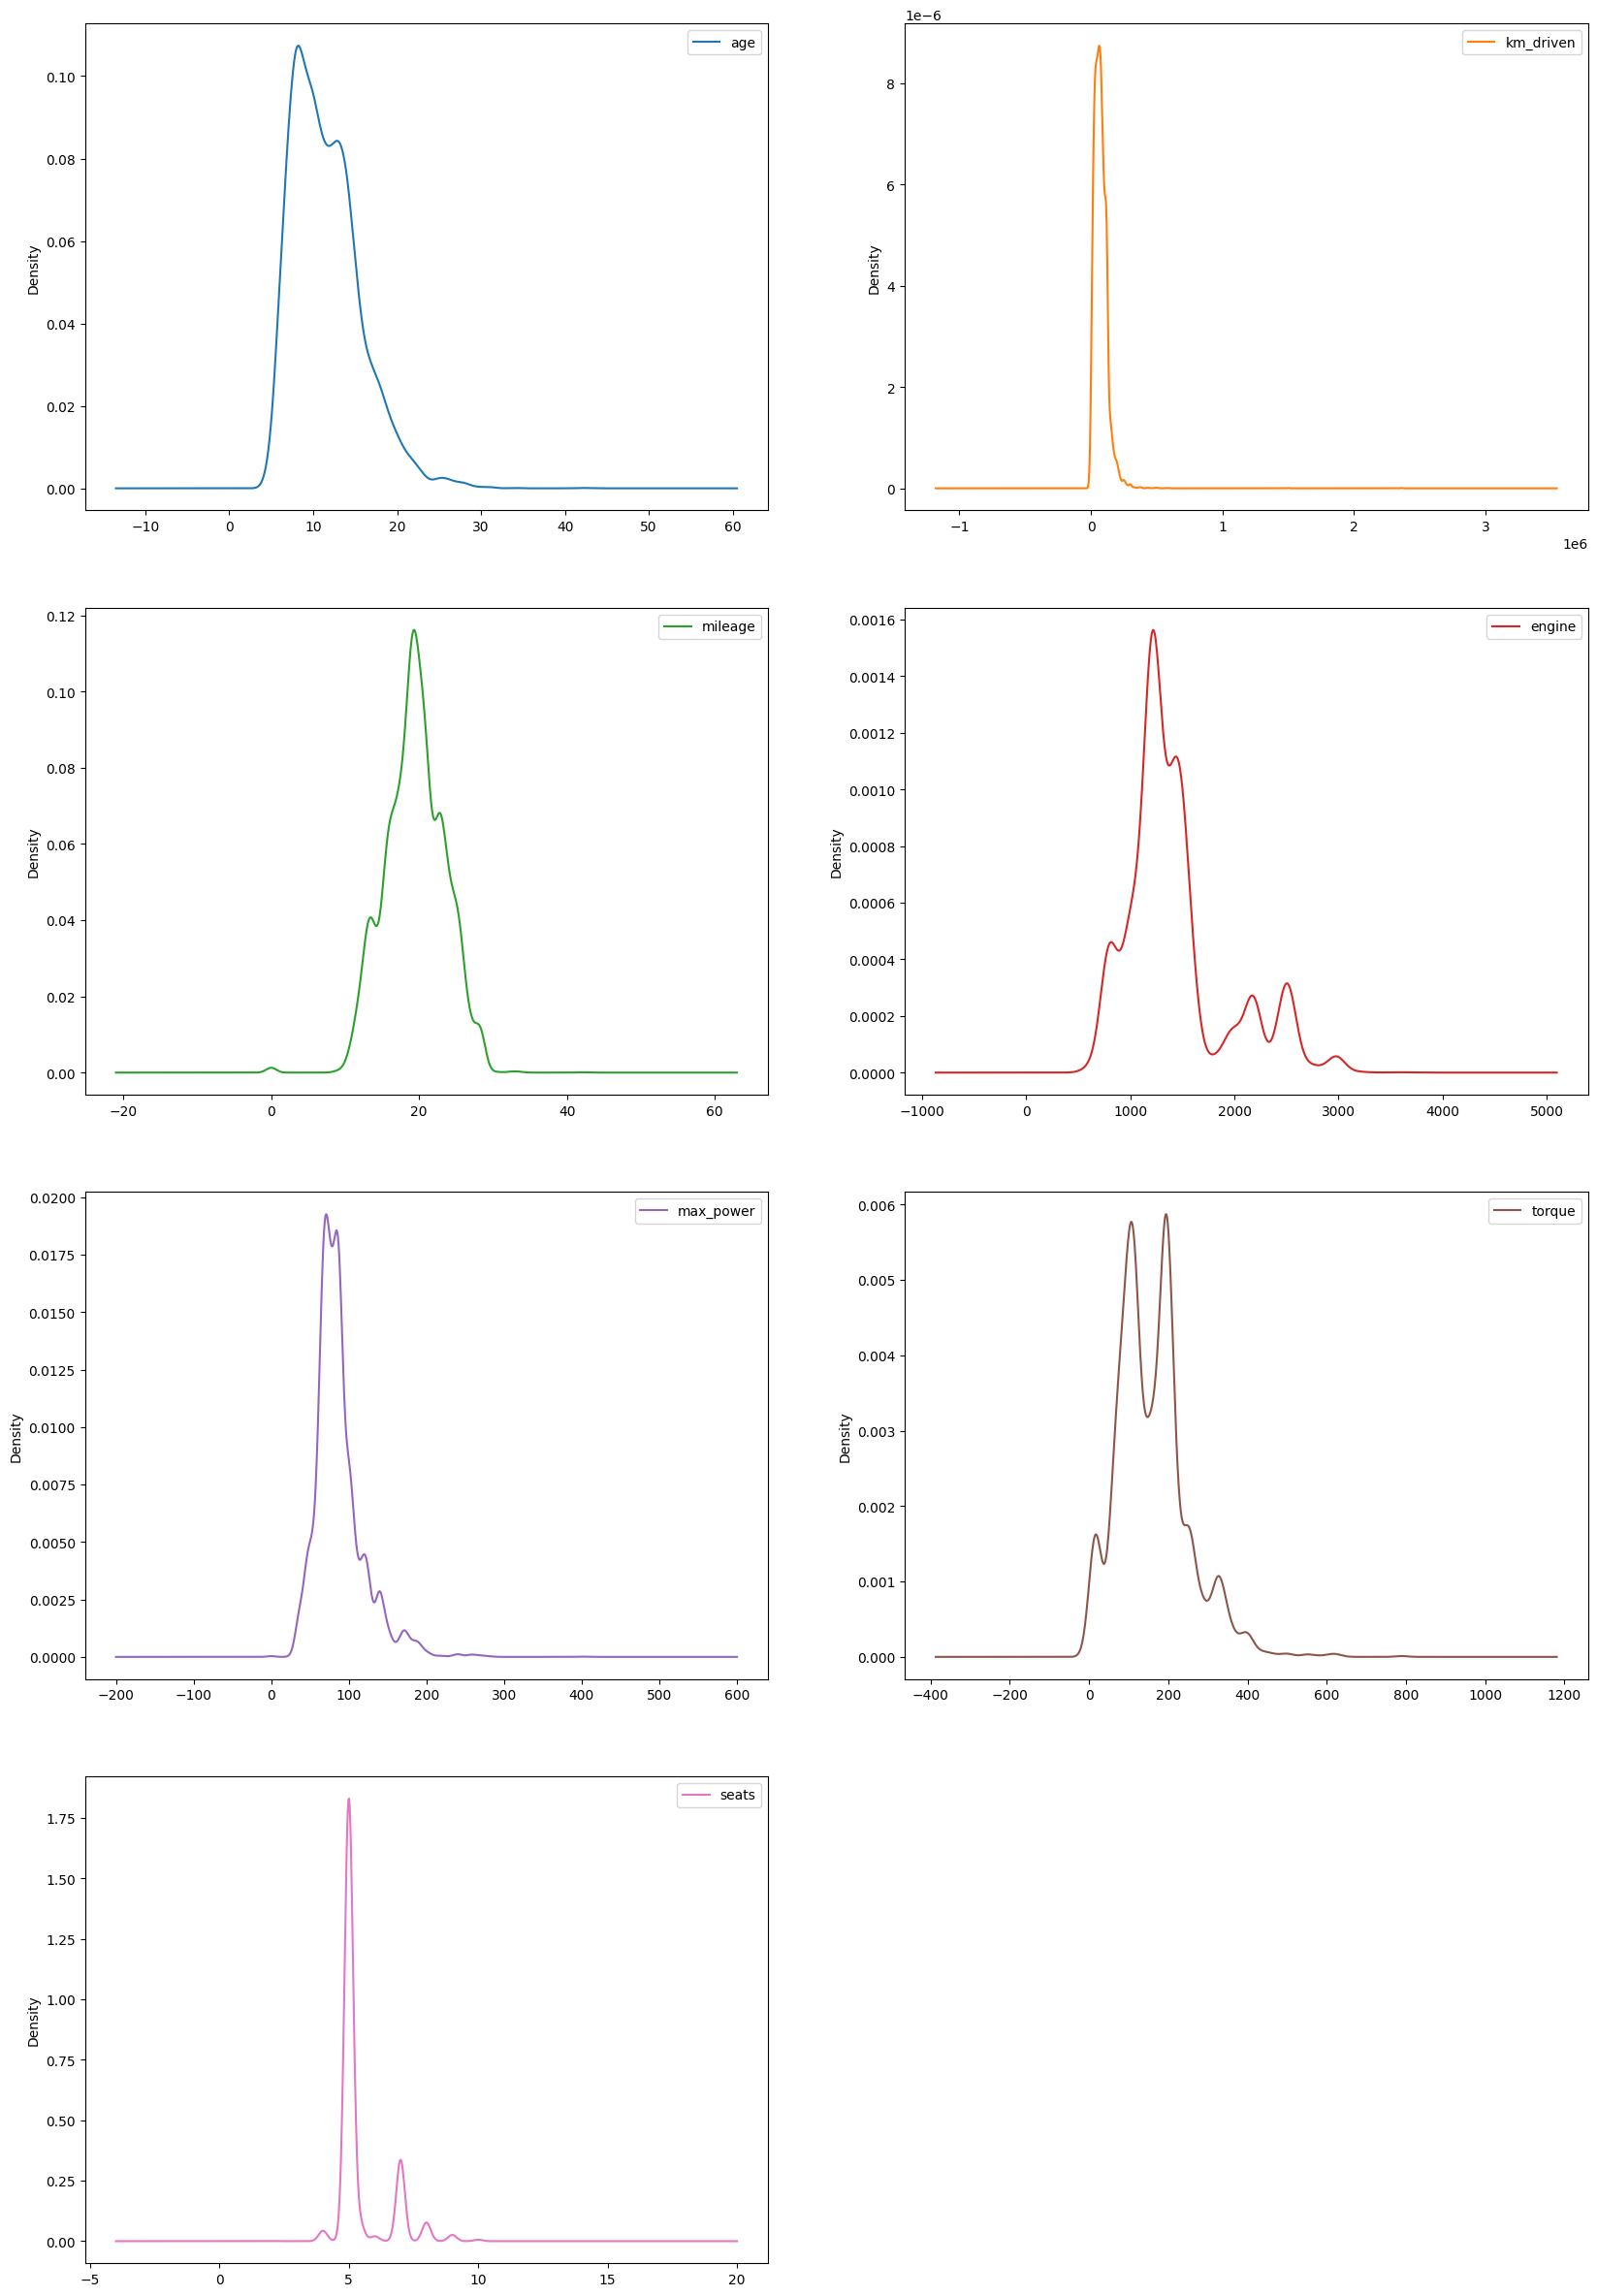

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
# Now Check Distribution of our data 
def distributions(X):
    num_cols=X.select_dtypes(include='number')
    num_cols.plot(
        kind='density',
        subplots=True,
        layout=(4,2),
        figsize=(20,30),
        sharex=False,
        sharey=False
    )
    plt.show()
    plt.tight_layout()
distributions(X)

In [29]:
X=df.drop(columns={'selling_price'})

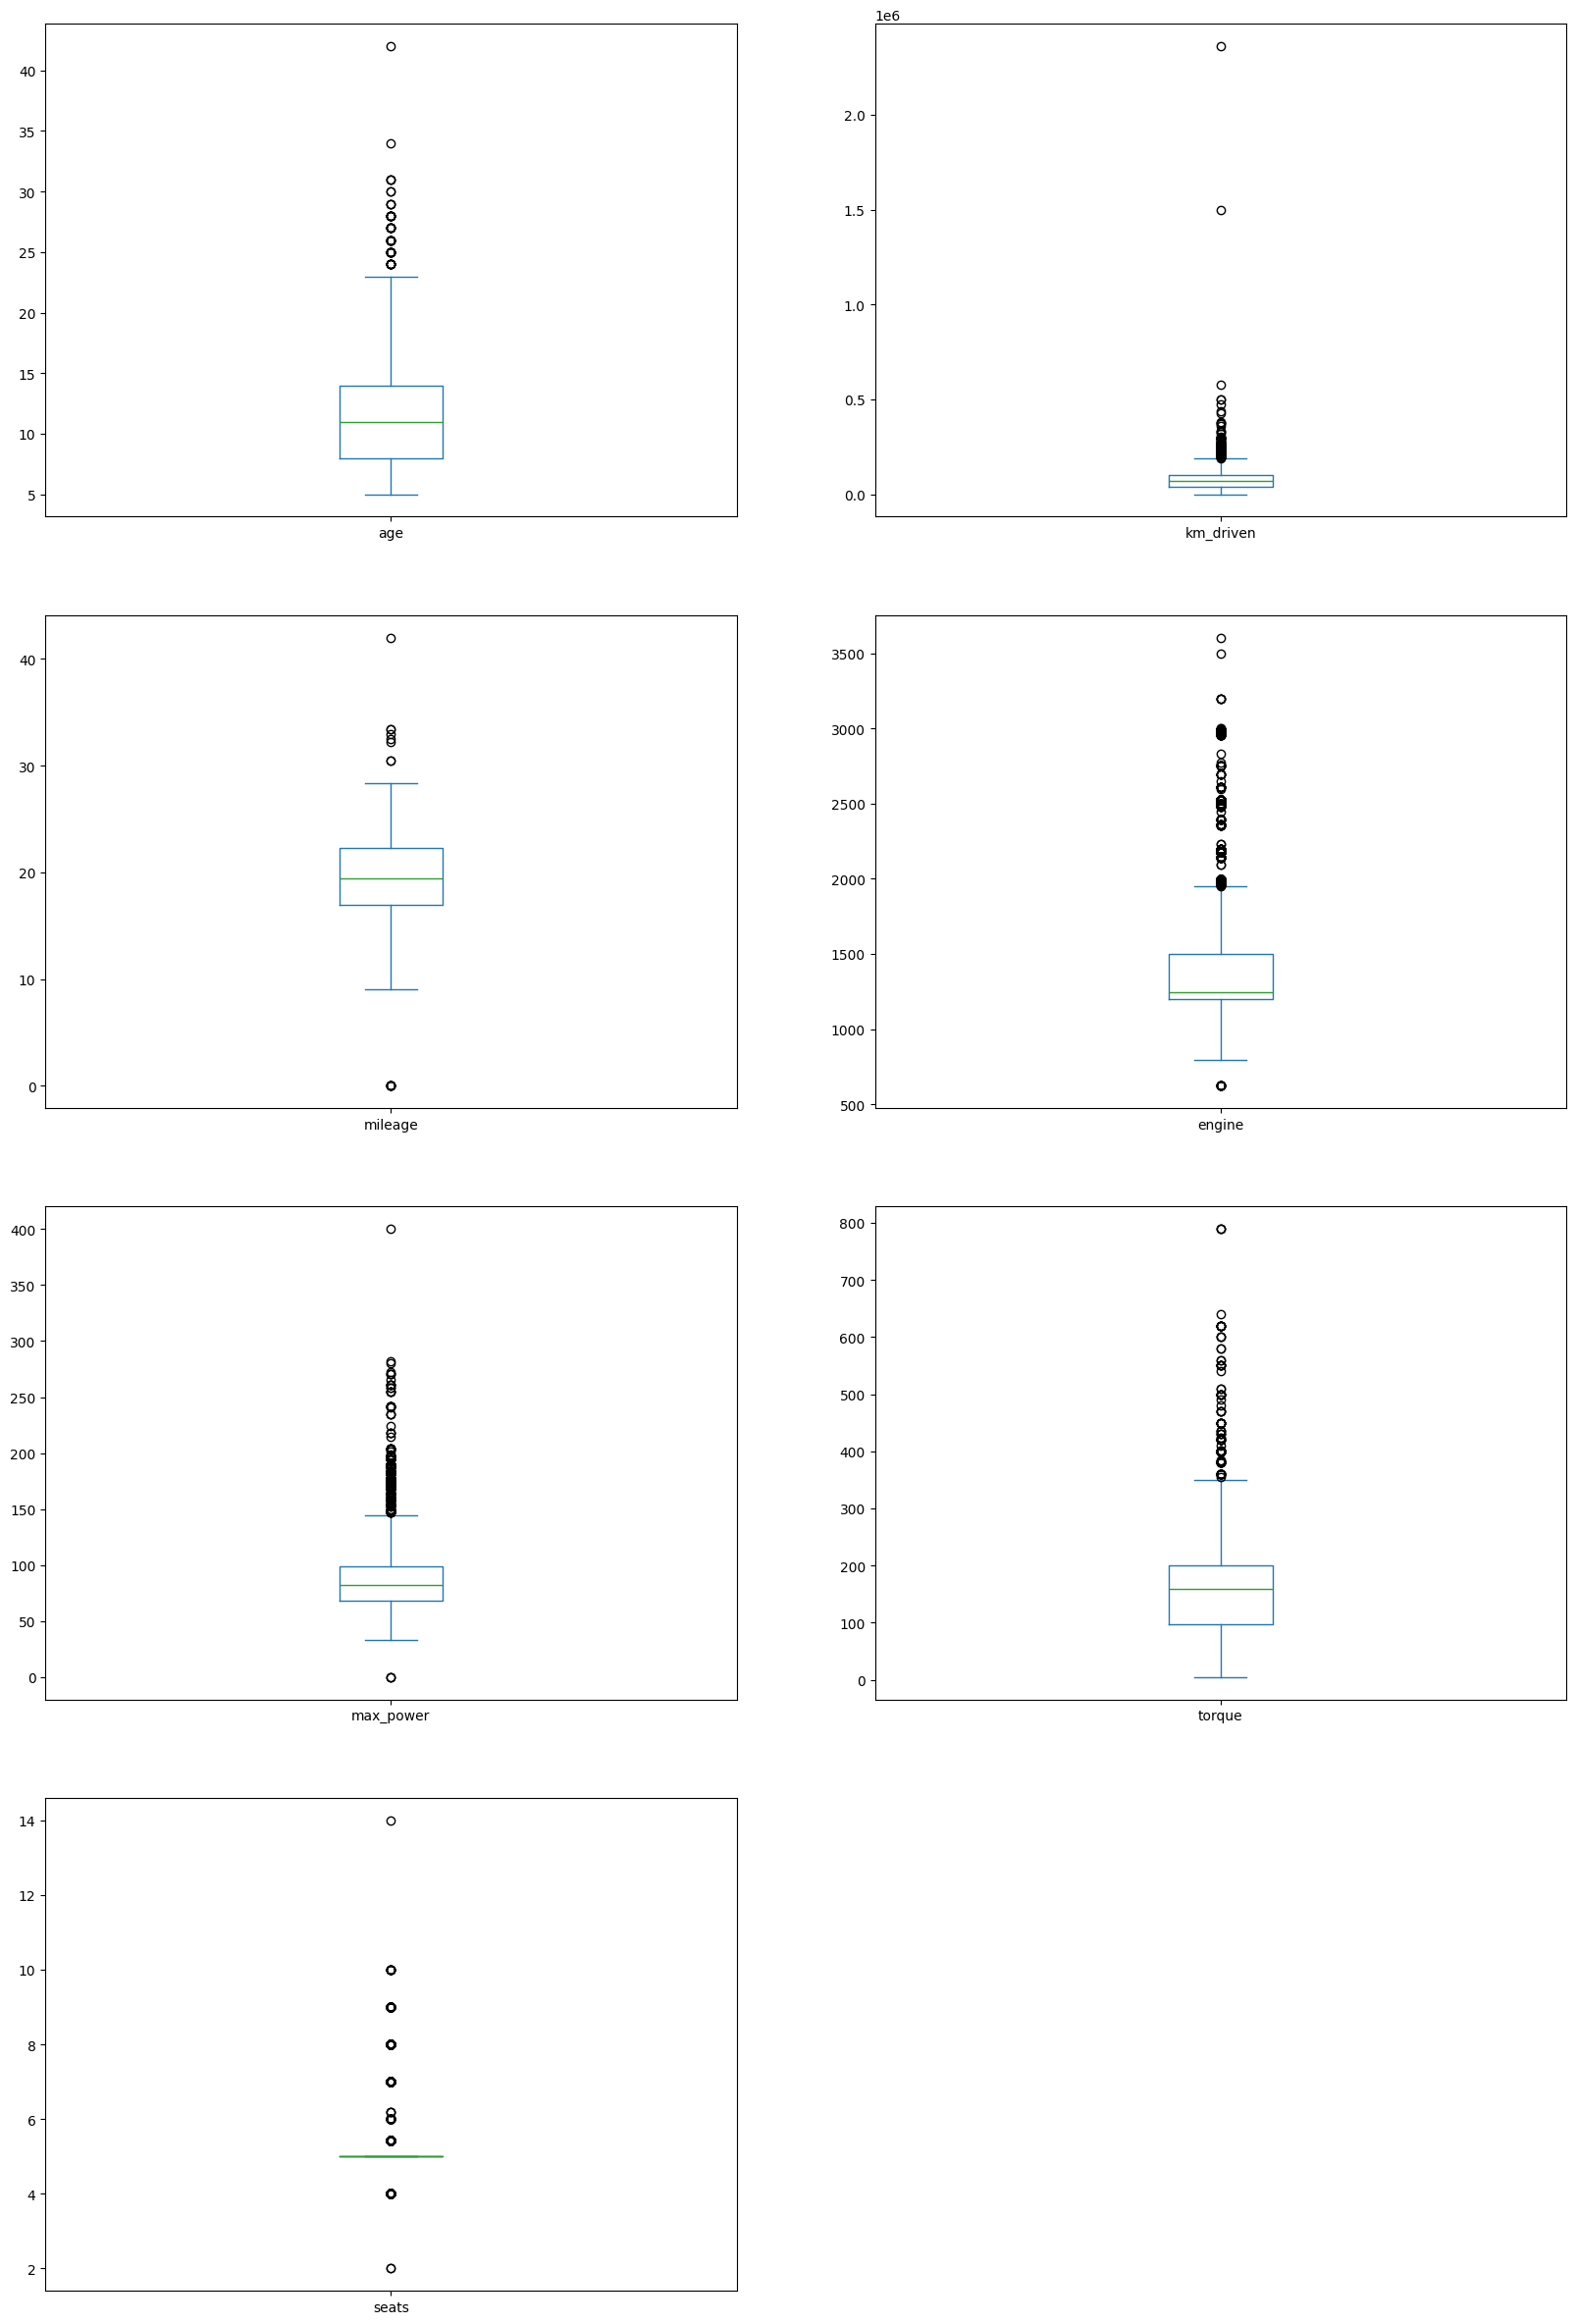

<Figure size 640x480 with 0 Axes>

In [30]:
def outliers(X):
    num_cols=X.select_dtypes(include='number')
    num_cols.plot(
        kind='box',
        subplots=True,
        layout=(4,2),
        figsize=(20,30),
        sharex=False,
        sharey=False
    )
    plt.show()
    plt.tight_layout()
outliers(X)

In [31]:
def transformations(df):
    X=df.drop(columns={'selling_price'})
    num_cols=X.select_dtypes(include='number')
    transformer=PowerTransformer(method='yeo-johnson')
    num_cols_new=transformer.fit_transform(num_cols)
    return num_cols_new
transform_arr=transformations(df)
transform_arr[0:,0]

array([0.04178821, 0.04178821, 1.59456628, ..., 0.29713297, 1.4466429 ,
       1.11991207])

In [32]:
def after_transformation(transform_arr,df):
    X=df.drop(columns={'selling_price'})
    num_cols=X.select_dtypes(include='number')
    names=X.select_dtypes(include='number').columns.values
    for iter in range(len(names)):
        num_cols[names[iter]] = transform_arr[0:,iter]
    return num_cols
trans_df=after_transformation(transform_arr,df)
trans_df.head()

,age,km_driven,mileage,engine,max_power,torque,seats
0,0.041788,1.345909,0.993170,-0.208047,-0.366261,0.438082,-0.396243
1,0.041788,0.997280,0.403828,0.386320,0.645706,1.005892,-0.396243
2,1.594566,1.274269,-0.465478,0.384244,-0.211483,-2.247197,-0.396243
3,0.938325,1.097397,0.887872,0.163148,0.216570,-1.964519,-0.396243
4,1.446643,0.997280,-0.857318,-0.075570,0.155485,-2.287815,-0.396243


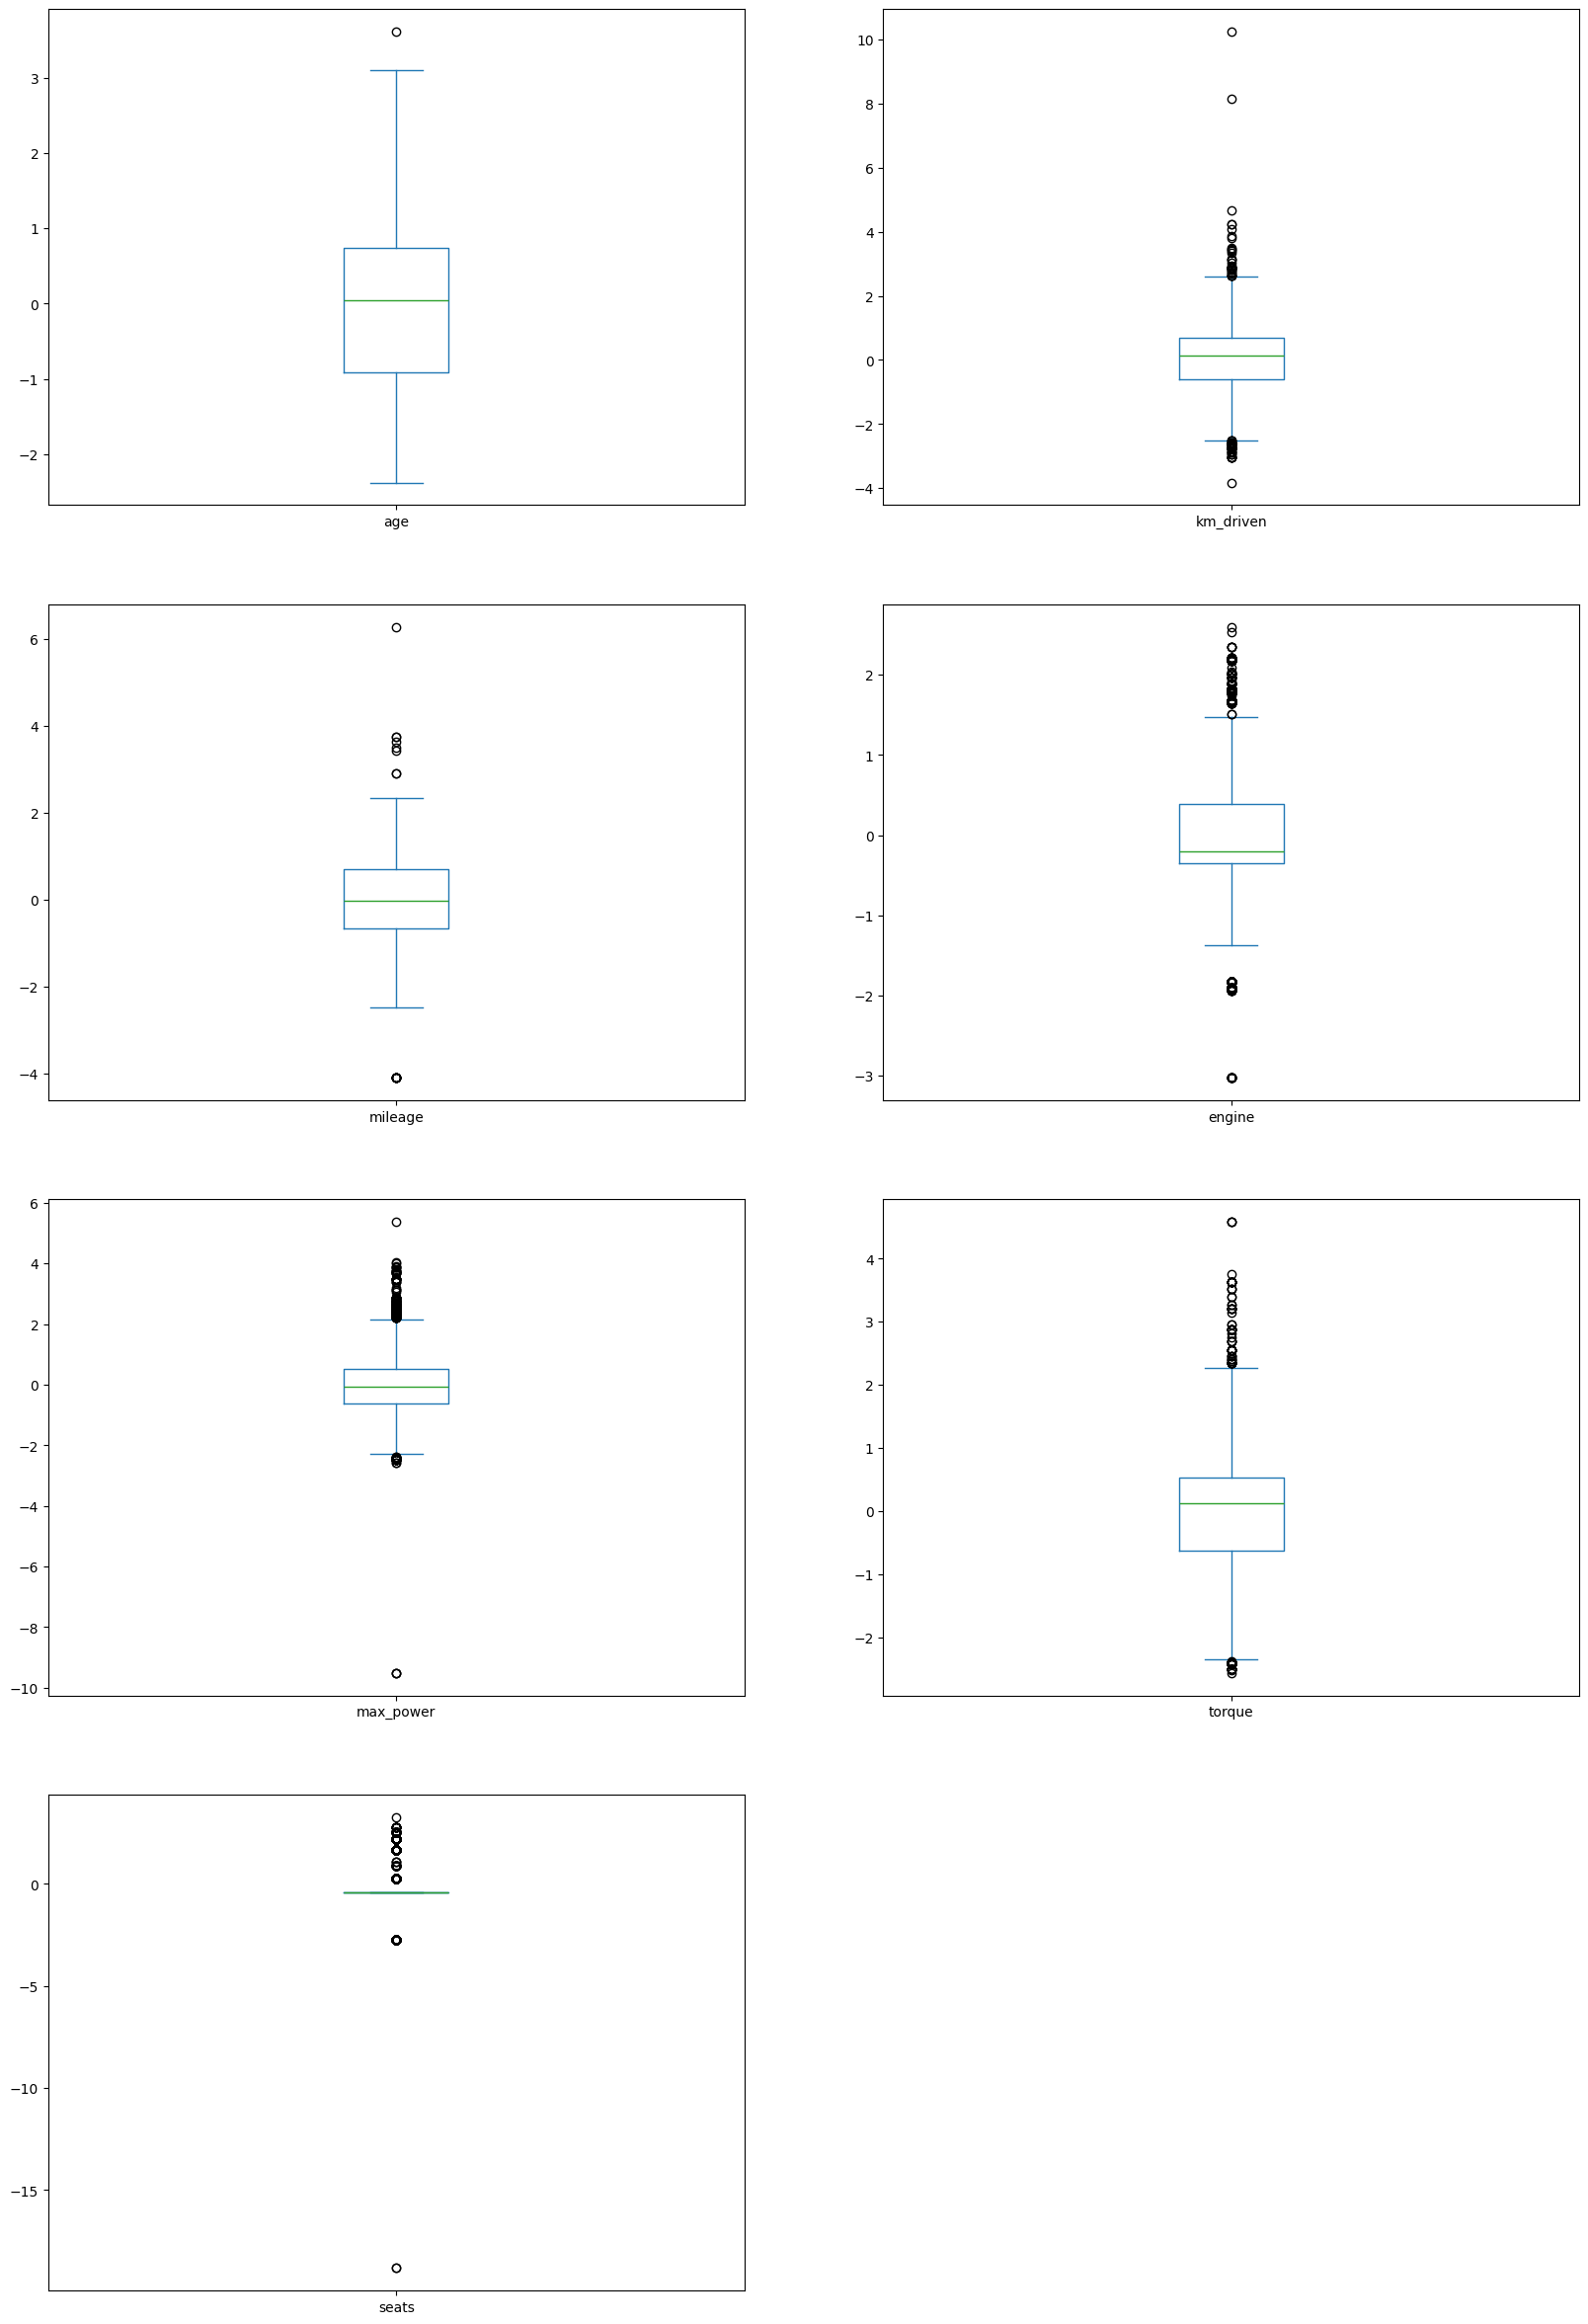

<Figure size 640x480 with 0 Axes>

In [33]:
outliers(trans_df)

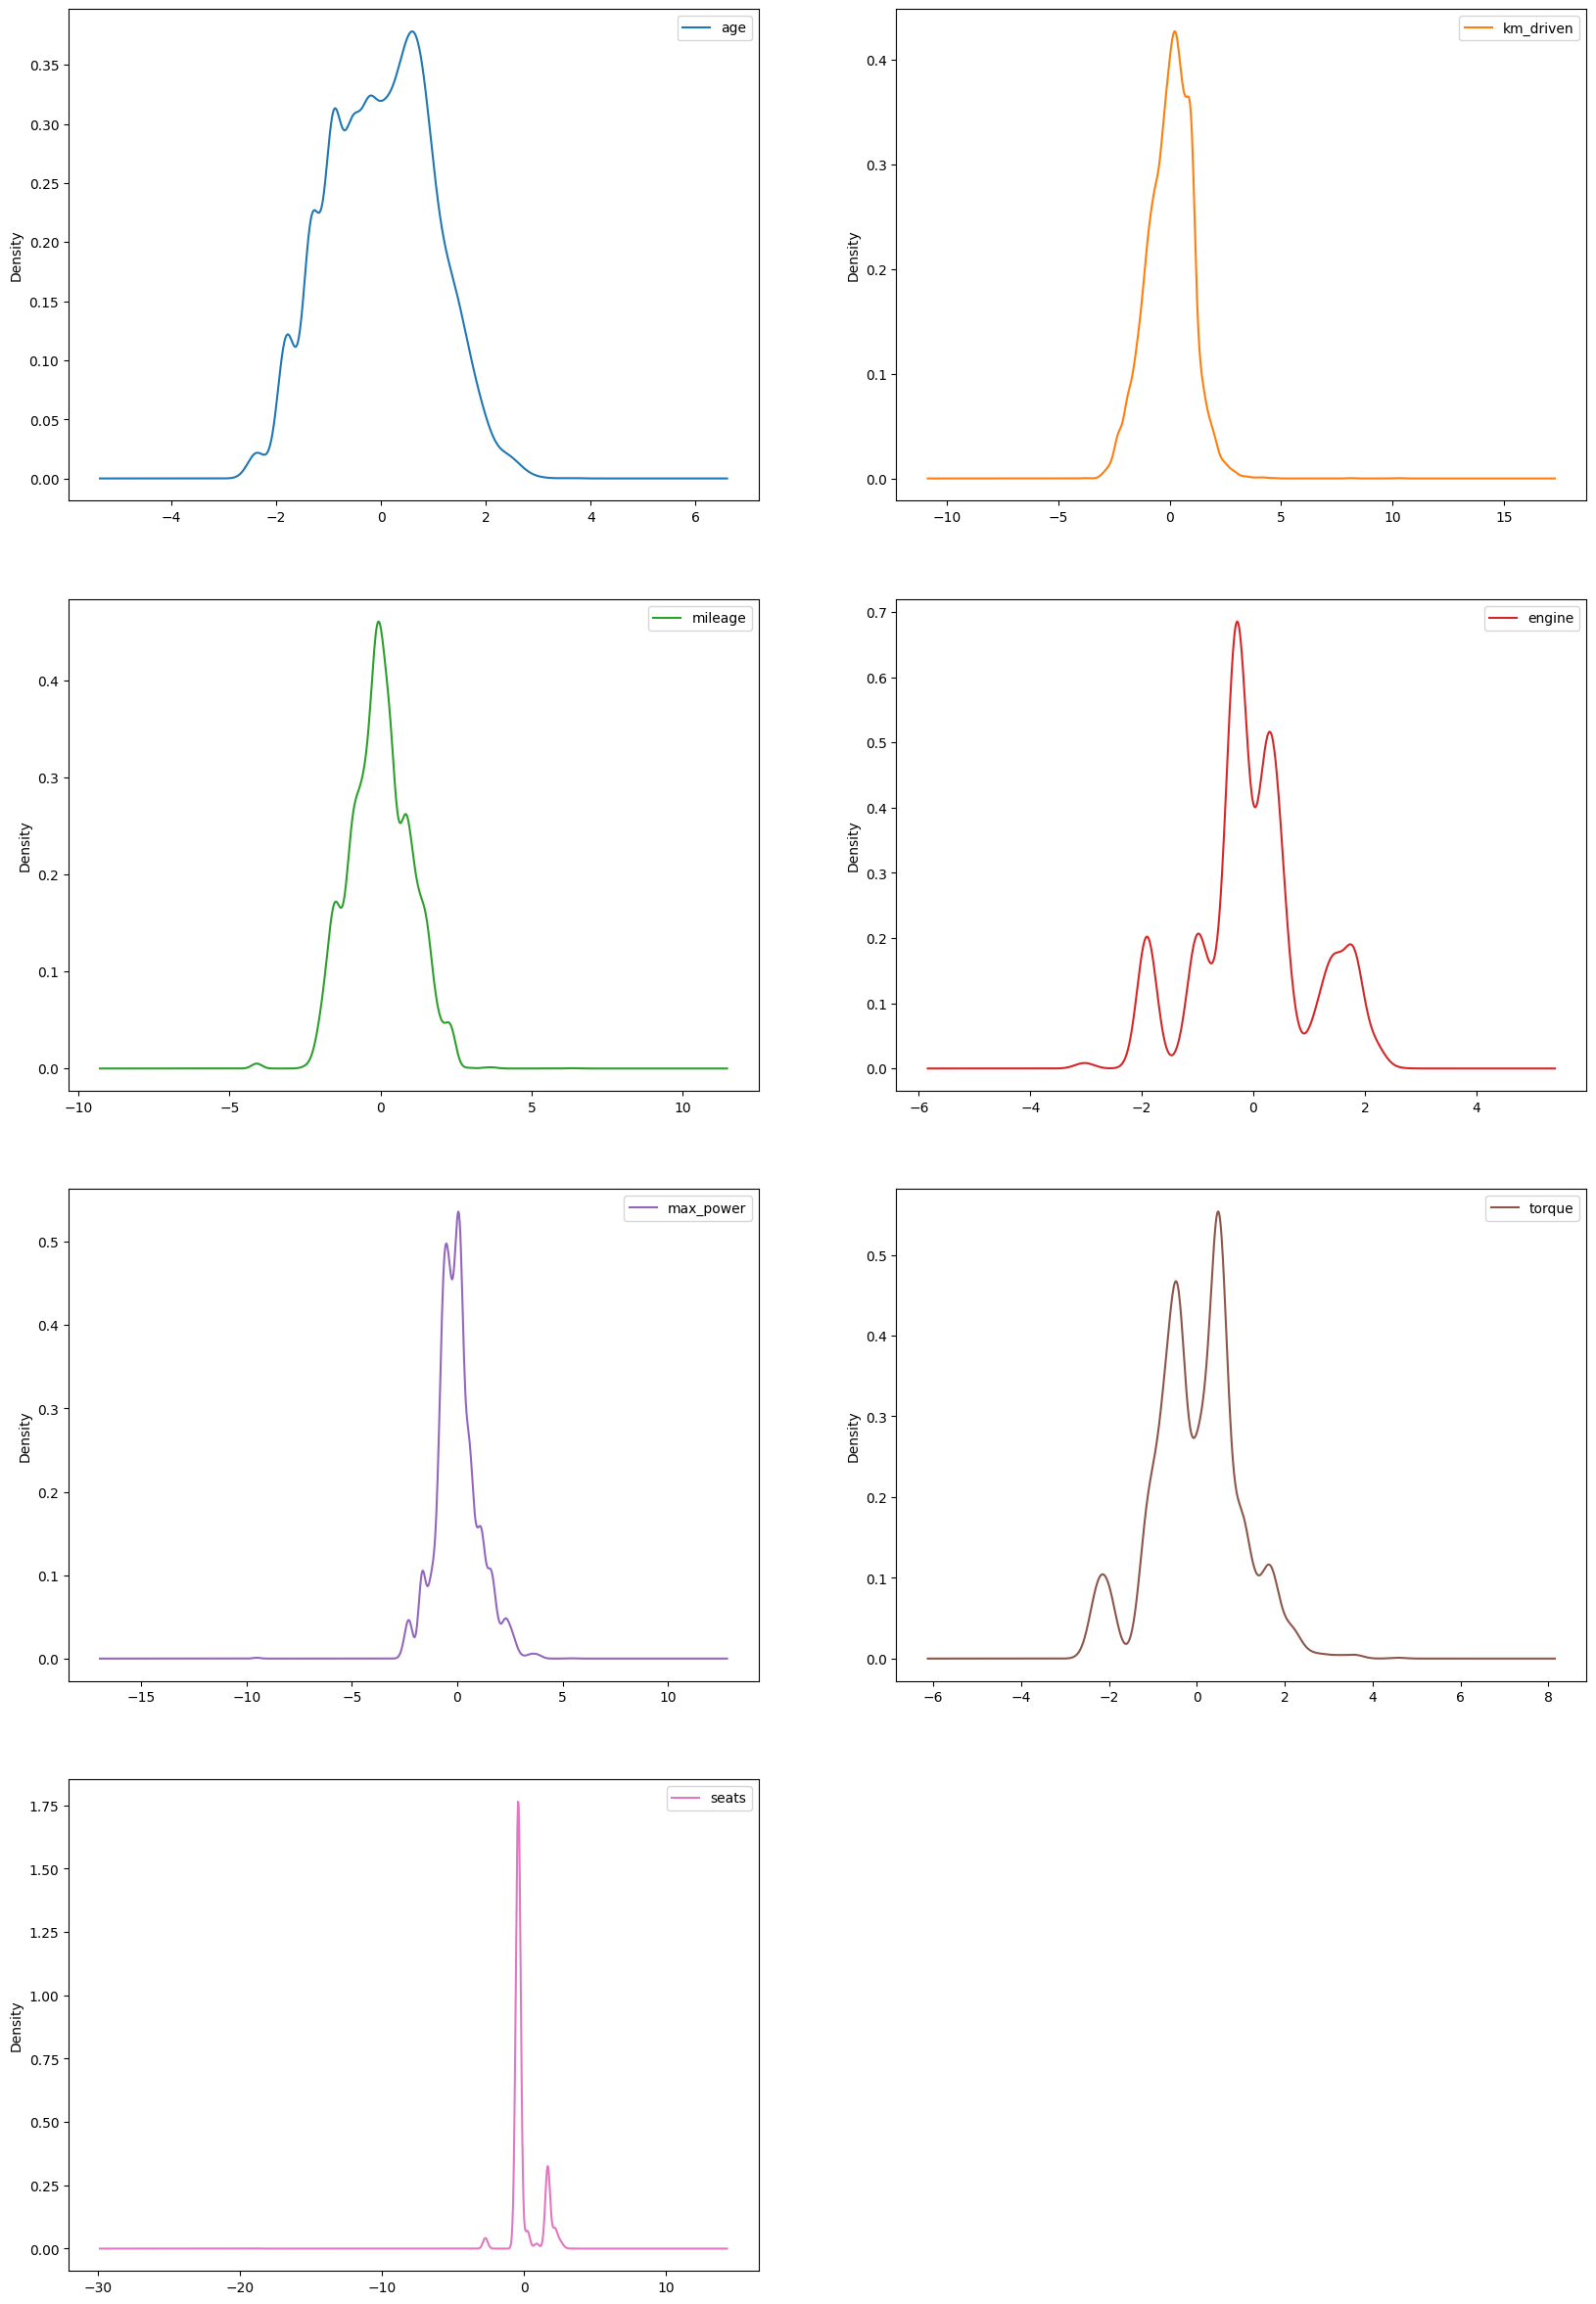

<Figure size 640x480 with 0 Axes>

In [34]:
distributions(trans_df)

In [35]:
# Lets scale our data using standard sacler
def scaling(trans_df):
    num_cols=trans_df.select_dtypes(include='number')
    scaler=StandardScaler()
    scaled_arr=scaler.fit_transform(num_cols)
    return scaled_arr
scaled_arr=scaling(trans_df)
scaled_arr.shape

(6926, 7)

In [36]:
def after_scaling(scaled_arr,trans_df):
    num_cols=trans_df.select_dtypes(include='number')
    names=trans_df.select_dtypes(include='number').columns.values
    for iter in range(len(names)):
        num_cols[names[iter]] = scaled_arr[0:,iter]
    return num_cols
scaled_df=after_scaling(scaled_arr,trans_df)
scaled_df.head()

,age,km_driven,mileage,engine,max_power,torque,seats
0,0.041788,1.345909,0.993170,-0.208047,-0.366261,0.438082,-0.396243
1,0.041788,0.997280,0.403828,0.386320,0.645706,1.005892,-0.396243
2,1.594566,1.274269,-0.465478,0.384244,-0.211483,-2.247197,-0.396243
3,0.938325,1.097397,0.887872,0.163148,0.216570,-1.964519,-0.396243
4,1.446643,0.997280,-0.857318,-0.075570,0.155485,-2.287815,-0.396243


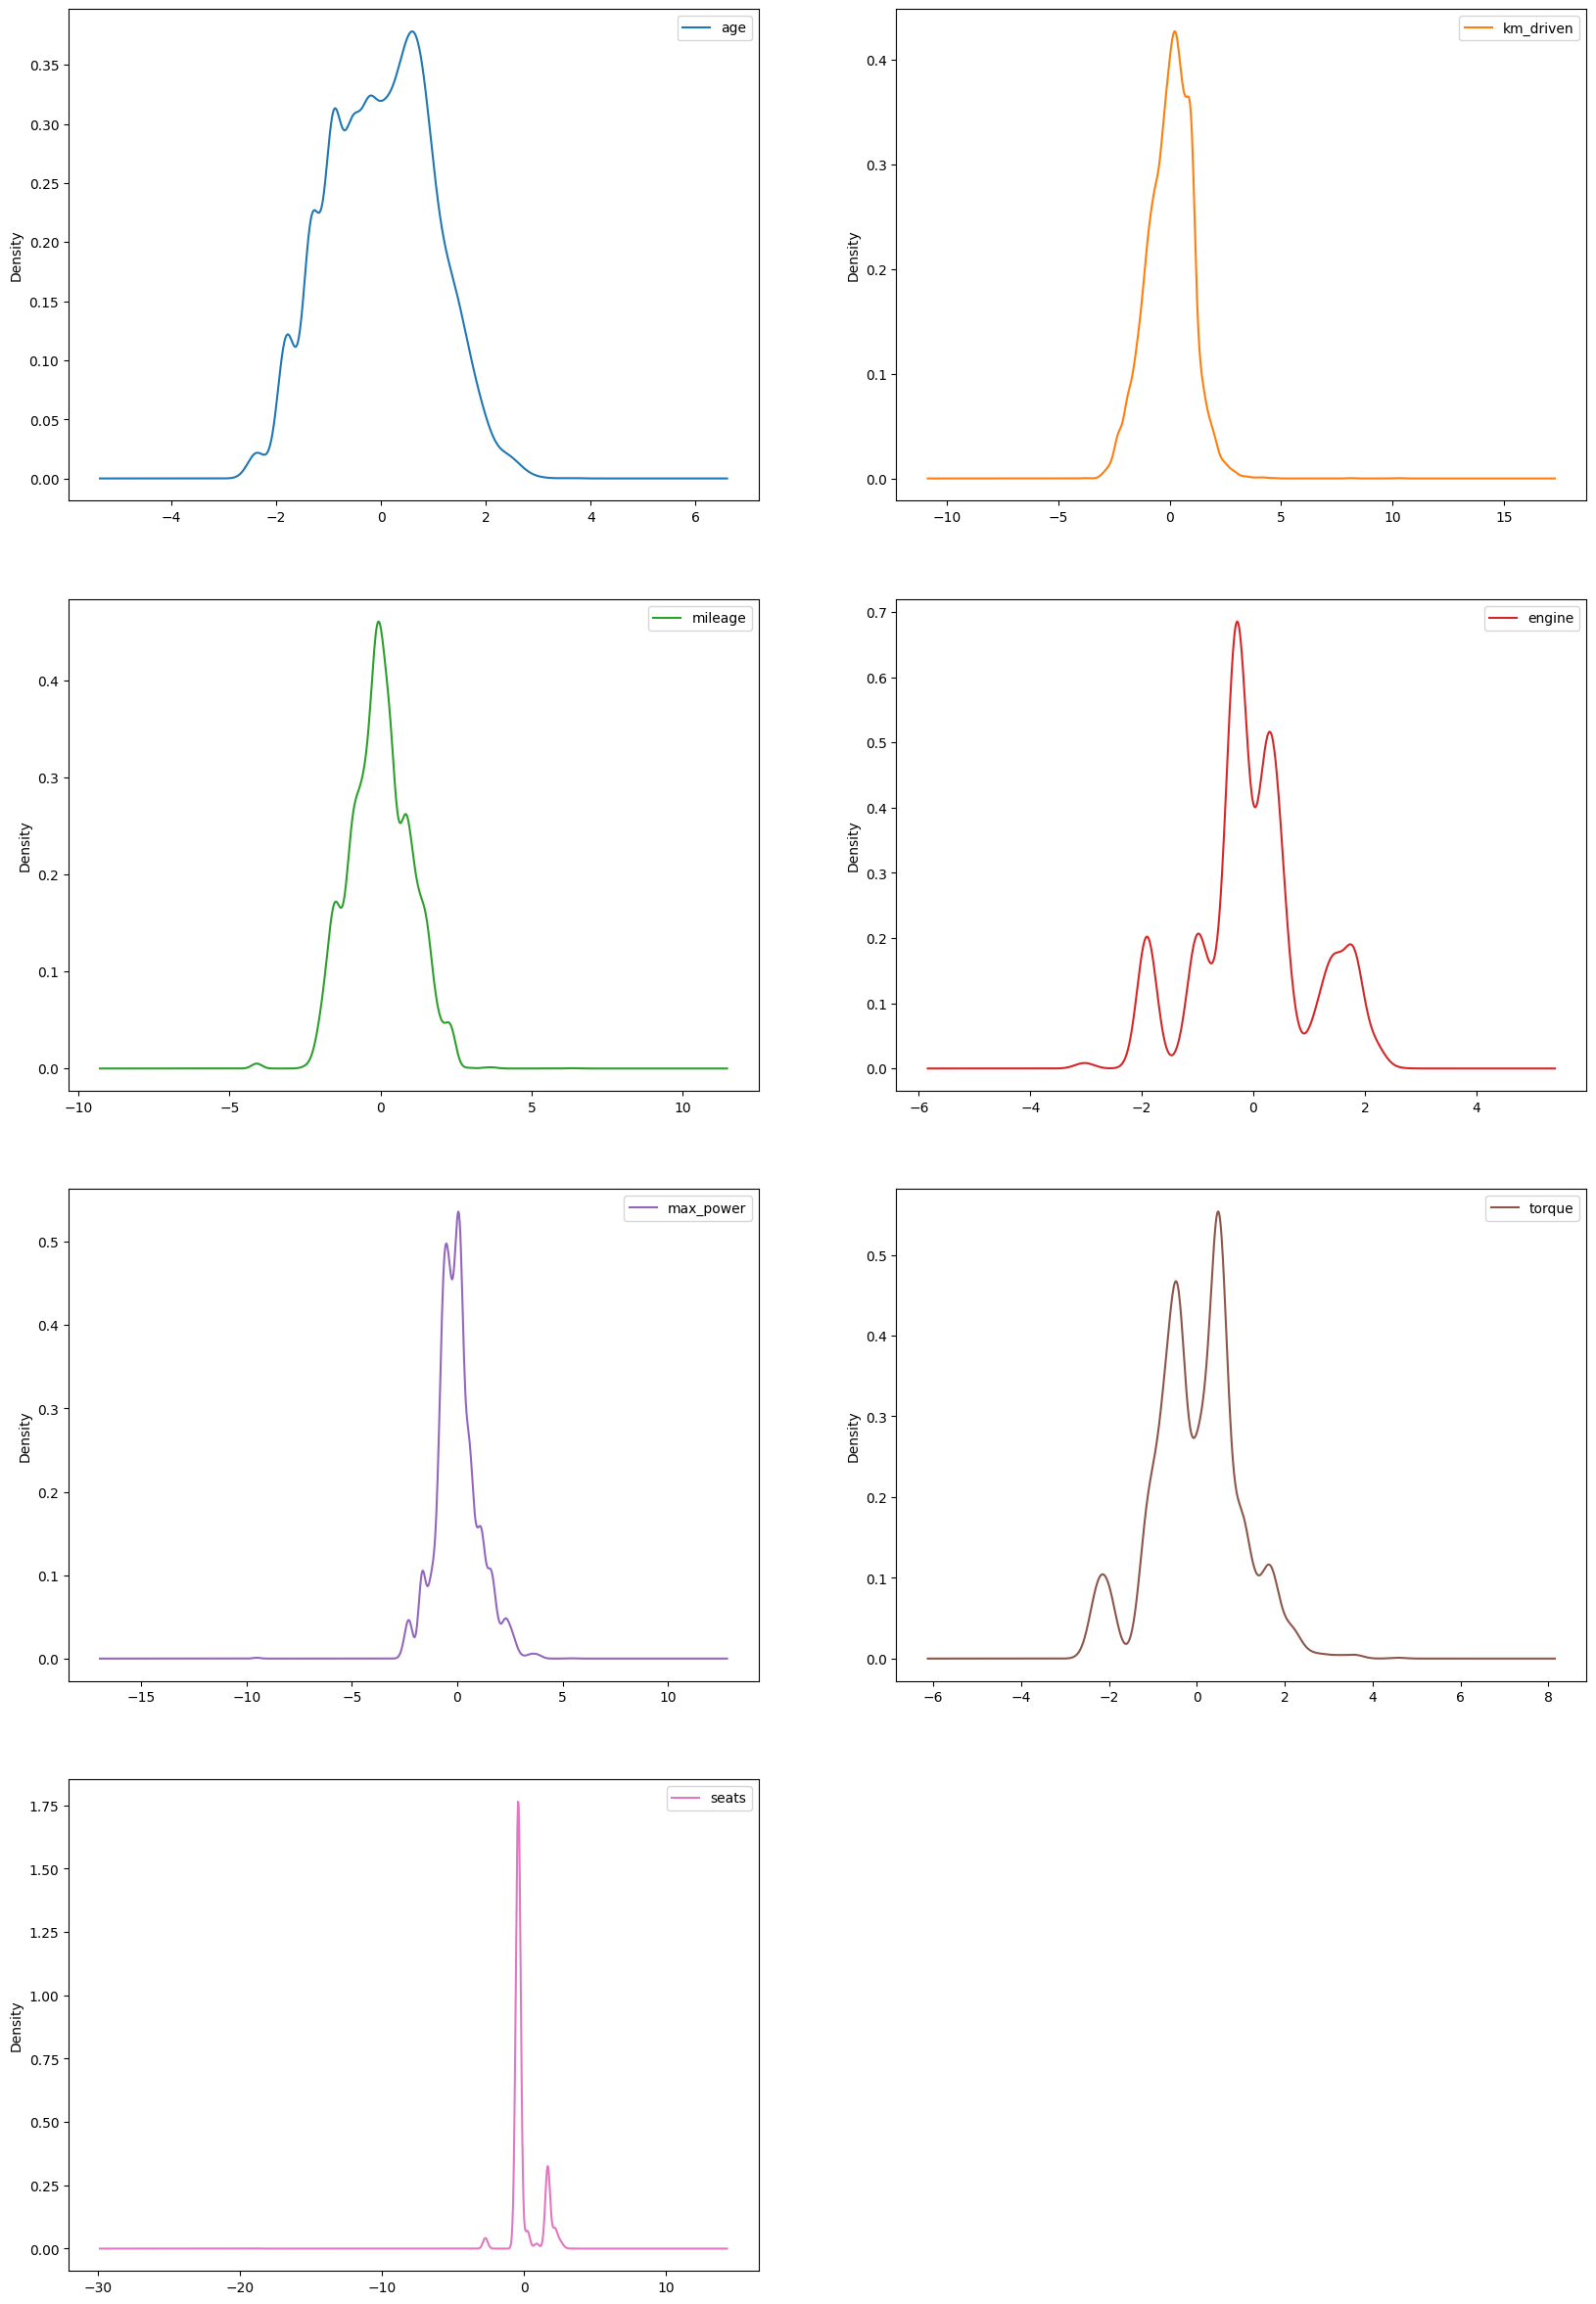

<Figure size 640x480 with 0 Axes>

In [37]:
distributions(scaled_df)

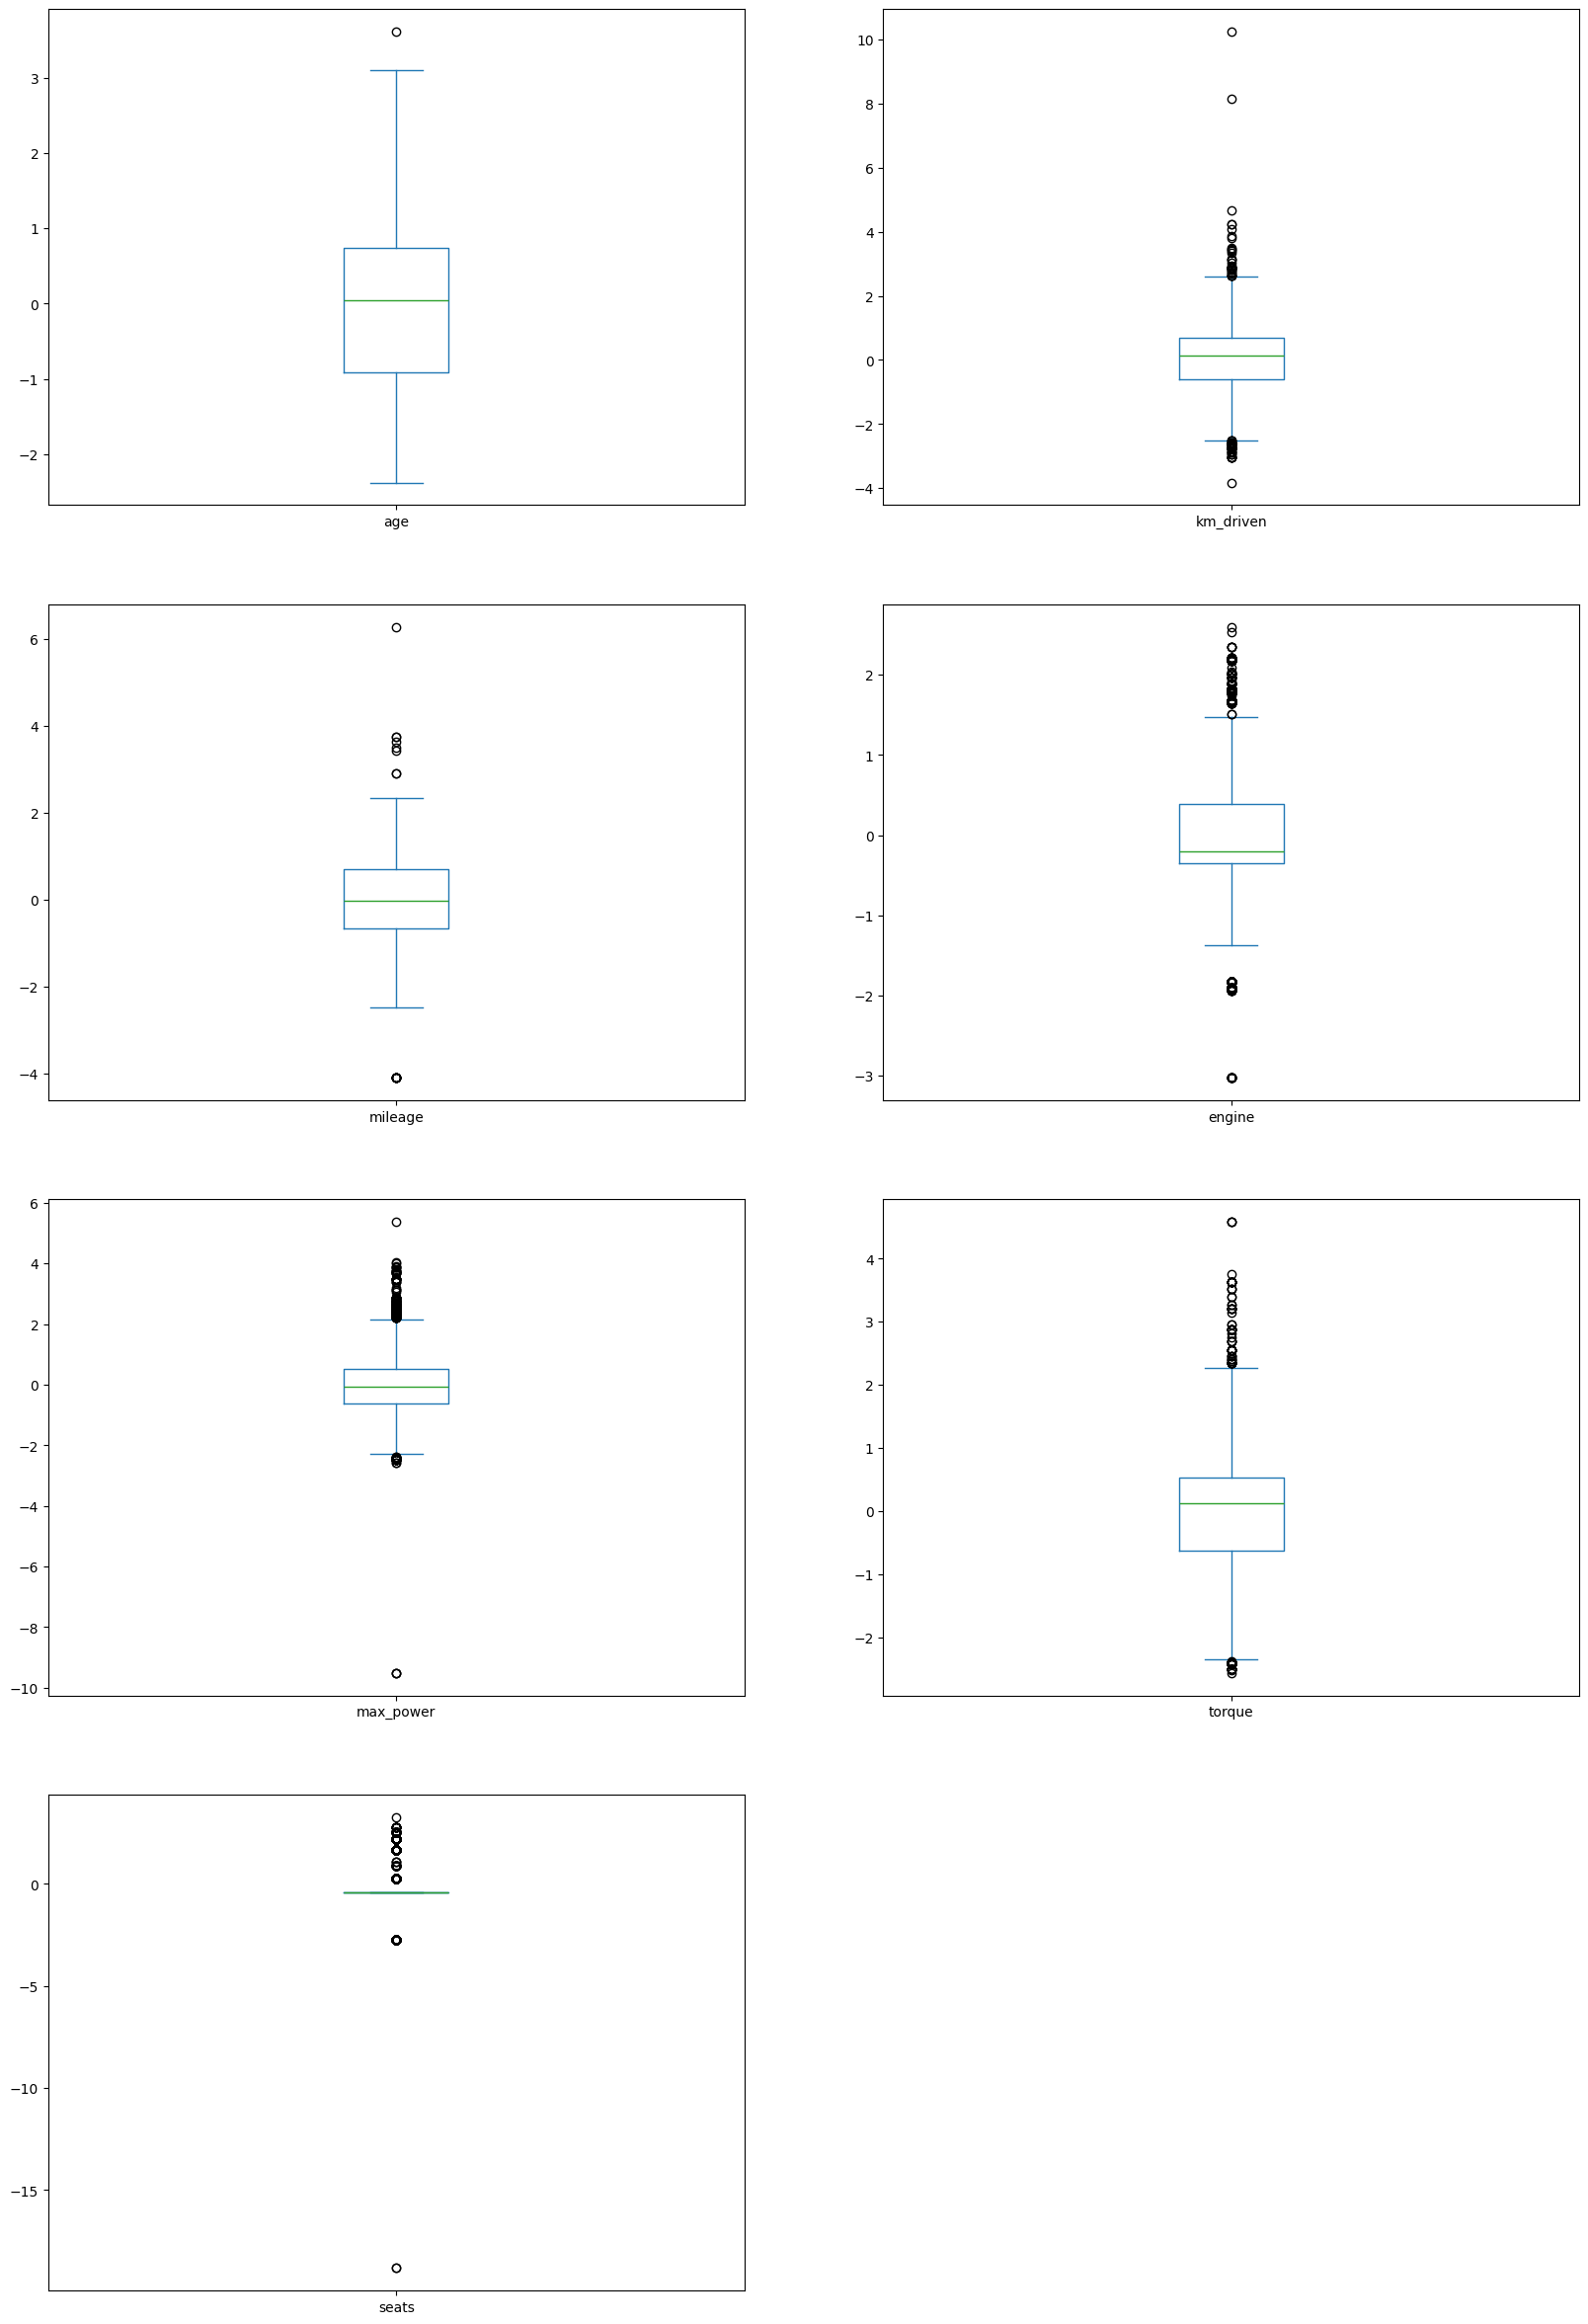

<Figure size 640x480 with 0 Axes>

In [38]:
outliers(scaled_df)

In [39]:
df.head(2)

,name,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti Swift Dzire VDI,11,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,11,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,370000


In [40]:
X=df.drop(columns={'name','selling_price'})
X.head()

,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,11,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,11,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0
2,19,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,5.0
3,15,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0
4,18,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5,5.0


In [41]:
y=df['selling_price']
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
X_train.head()

,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3785,14,80000,Diesel,Individual,Manual,First Owner,13.93,2179.0,138.03,320.0,7.0
6479,8,60000,Petrol,Individual,Manual,First Owner,20.63,1198.0,67.00,104.0,5.0
889,16,100000,Diesel,Individual,Manual,Fourth & Above Owner,17.70,1399.0,68.00,16.0,5.0
8001,14,80000,Petrol,Individual,Manual,Second Owner,16.60,1388.0,68.00,16.3,5.0
1363,15,80000,Petrol,Individual,Manual,Third Owner,20.36,1197.0,78.90,111.8,5.0


In [43]:
# Creating a Categorical handling Pipeline
cat_cols=X_train.select_dtypes(include='object').columns.values.tolist()
encoding=OneHotEncoder(handle_unknown='ignore')
encoding

OneHotEncoder(handle_unknown='ignore')

In [44]:
num_cols = X_train.select_dtypes(include='number').columns.values.tolist()
num_cols

['age', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']

In [45]:
# Creating a Numerical Values Handling Pipeline 

num_handling=Pipeline(
    [
        ('transformer',PowerTransformer(method='yeo-johnson')),
        ('scaling',StandardScaler())
    ]
)
num_handling

Pipeline(steps=[('transformer', PowerTransformer()),
                ('scaling', StandardScaler())])

In [46]:
transformation=ColumnTransformer(
    [
        ('cats',encoding,cat_cols),
        ('nums',num_handling,num_cols)
    ]
)
transformation

ColumnTransformer(transformers=[('cats', OneHotEncoder(handle_unknown='ignore'),
                                 ['fuel', 'seller_type', 'transmission',
                                  'owner']),
                                ('nums',
                                 Pipeline(steps=[('transformer',
                                                  PowerTransformer()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['age', 'km_driven', 'mileage', 'engine',
                                  'max_power', 'torque', 'seats'])])

In [47]:
full_pipeline = Pipeline([
    ('pre', transformation),                    # your ColumnTransformer
    ('poly', PolynomialFeatures(include_bias=False, interaction_only=False)),
    ('reg', LinearRegression())                 # placeholder estimator; GridSearch will try alternatives
])

In [48]:
from sklearn.linear_model import ElasticNet
param_grid = [
    # Try simple polynomial + LinearRegression
    {
        'poly__degree': [1, 2],                # degree 1 = linear, 2 = quadratic
        'reg': [LinearRegression()],
        'reg__fit_intercept': [True]           # valid for LinearRegression
    },
    # Try polynomial + Ridge (regularized) for degrees that tend to blow up features
    {
        'poly__degree': [1, 2, 3],
        'reg': [Ridge()],
        'reg__alpha': [0.01, 0.1, 1.0, 10.0], # regularization strengths
        'reg__fit_intercept': [True]
    },
    {
        'poly__degree': [1, 2, 3],
        'reg': [ElasticNet()],
        'reg__alpha': [0.01, 0.1, 1.0, 10.0], # regularization strengths
        'reg__fit_intercept': [True]
    }
]

In [49]:
# 5) GridSearchCV setup
grid = GridSearchCV(
    estimator=full_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # tune for MSE
    n_jobs=-1,
    verbose=2
)

In [50]:
# 6) Fit grid search
grid.fit(X_train, y_train)

# 7) Best found parameters
print("Best params:\n", grid.best_params_)
print("Best CV (neg MSE):", grid.best_score_)

# 8) Evaluate on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train=best_model.predict(X_train)

mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)

r2_train=r2_score(y_train, y_pred_train)

print(f"Train R^2 : {r2_train:.4f}")

print(f"Test R^2 : {r2_test:.4f}")

# 9) If you want to inspect coefficients (for LinearRegression or Ridge)
# Note: After preprocessing + poly, feature names are not trivial. You can still get coef_
reg_step = best_model.named_steps['reg']

print("Number of learned coefficients:", getattr(reg_step, "coef_", None).shape)

Fitting 5 folds for each of 26 candidates, totalling 130 fits
Best params:
 {'poly__degree': 2, 'reg': Ridge(), 'reg__alpha': 10.0, 'reg__fit_intercept': True}
Best CV (neg MSE): -50543059141.383156
Train R^2 : 0.8589
Test R^2 : 0.8259
Number of learned coefficients: (252,)
